# Aviation Data Analytics Project
## Cathay Pacific Digital & IT Summer Internship Programme 2026

This notebook demonstrates comprehensive data analytics skills including:
- Data exploration and cleaning
- Statistical analysis
- Advanced visualizations
- Predictive modeling
- Business insights and recommendations


## 1. Import Libraries and Load Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load data
df = pd.read_csv('data/flight_delays_sample.csv')
df['date'] = pd.to_datetime(df['date'])

print(f"✓ Loaded {len(df):,} flight records")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
df.head()


✓ Loaded 5,000 flight records
Date range: 2024-01-01 00:00:00 to 2024-07-27 07:00:00


,date,airline,origin,destination,scheduled_departure,actual_departure,scheduled_arrival,actual_arrival,departure_delay,arrival_delay,flight_duration,distance,delay_category,day_of_week,month,hour
0,2024-01-01 00:00:00,BA,LHR,LAX,742,765,952,973,23,21,2.1,1714,Moderate Delay,Monday,1,0
1,2024-01-01 01:00:00,UA,LAX,NRT,510,535,620,649,25,29,1.1,883,Moderate Delay,Monday,1,1
2,2024-01-01 02:00:00,QF,CDG,LAX,2332,2329,2612,2615,-3,3,2.8,2274,Early/On-time,Monday,1,2
3,2024-01-01 03:00:00,DL,NRT,CDG,657,729,937,1004,72,67,2.8,2204,Major Delay,Monday,1,3
4,2024-01-01 04:00:00,BA,NRT,DXB,1745,1725,1955,1921,-20,-34,2.1,1677,Early/On-time,Monday,1,4


## 2. Data Overview and Quality Check


In [2]:
# Basic information
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nBasic Statistics:")
df.describe()


Dataset Shape: (5000, 16)

Column Names:
['date', 'airline', 'origin', 'destination', 'scheduled_departure', 'actual_departure', 'scheduled_arrival', 'actual_arrival', 'departure_delay', 'arrival_delay', 'flight_duration', 'distance', 'delay_category', 'day_of_week', 'month', 'hour']

Data Types:
date                   datetime64[ns]
airline                        object
origin                         object
destination                    object
scheduled_departure             int64
actual_departure                int64
scheduled_arrival               int64
actual_arrival                  int64
departure_delay                 int64
arrival_delay                   int64
flight_duration               float64
distance                        int64
delay_category                 object
day_of_week                    object
month                           int64
hour                            int64
dtype: object

Missing Values:
date                   0
airline                0
origin       

,date,scheduled_departure,actual_departure,scheduled_arrival,actual_arrival,departure_delay,arrival_delay,flight_duration,distance,month,hour
count,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2024-04-14 03:30:00,1186.417400,1199.117400,1439.165600,1451.705400,12.700000,12.539800,2.52750,2023.619200,3.942400,11.487200
min,2024-01-01 00:00:00,0.000000,-20.000000,61.000000,67.000000,-20.000000,-48.000000,0.60000,500.000000,1.000000,0.000000
25%,2024-02-22 01:45:00,607.750000,606.000000,838.000000,851.000000,-9.250000,-10.000000,1.60000,1308.000000,2.000000,5.000000
50%,2024-04-14 03:30:00,1216.000000,1226.000000,1457.000000,1470.000000,10.000000,10.000000,2.50000,1997.000000,4.000000,11.000000
75%,2024-06-05 05:15:00,1804.000000,1796.250000,2033.000000,2049.000000,31.000000,32.000000,3.30000,2672.250000,6.000000,17.000000
max,2024-07-27 07:00:00,2358.000000,2423.000000,2814.000000,2842.000000,144.000000,159.000000,7.00000,5611.000000,7.000000,23.000000
std,NaN,693.327954,694.019209,704.504726,705.364989,25.885525,27.839789,1.17286,935.580523,1.976022,6.925332


## 3. Key Performance Indicators (KPIs)


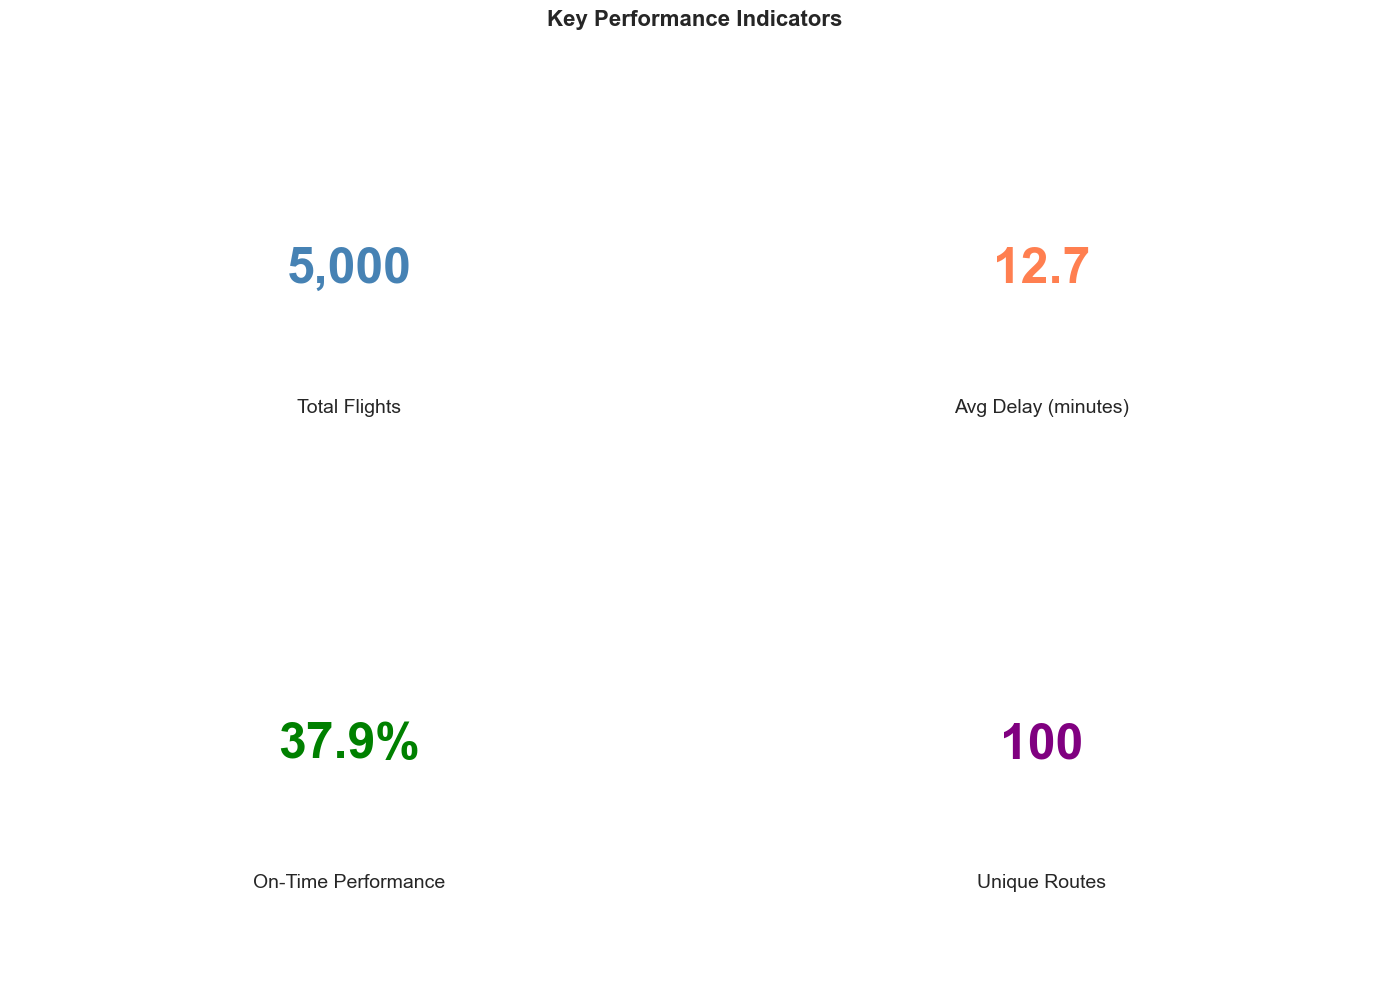

In [3]:
# Calculate key metrics
total_flights = len(df)
avg_delay = df['departure_delay'].mean()
on_time_pct = (df['departure_delay'] <= 0).sum() / len(df) * 100
total_airlines = df['airline'].nunique()
total_routes = df.groupby(['origin', 'destination']).ngroups

# Display KPIs
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Key Performance Indicators', fontsize=16, fontweight='bold')

# KPI 1: Total Flights
axes[0, 0].text(0.5, 0.5, f"{total_flights:,}", ha='center', va='center', 
                fontsize=36, fontweight='bold', color='steelblue')
axes[0, 0].text(0.5, 0.2, 'Total Flights', ha='center', va='center', fontsize=14)
axes[0, 0].axis('off')

# KPI 2: Average Delay
axes[0, 1].text(0.5, 0.5, f"{avg_delay:.1f}", ha='center', va='center', 
                fontsize=36, fontweight='bold', color='coral')
axes[0, 1].text(0.5, 0.2, 'Avg Delay (minutes)', ha='center', va='center', fontsize=14)
axes[0, 1].axis('off')

# KPI 3: On-Time Performance
axes[1, 0].text(0.5, 0.5, f"{on_time_pct:.1f}%", ha='center', va='center', 
                fontsize=36, fontweight='bold', color='green')
axes[1, 0].text(0.5, 0.2, 'On-Time Performance', ha='center', va='center', fontsize=14)
axes[1, 0].axis('off')

# KPI 4: Total Routes
axes[1, 1].text(0.5, 0.5, f"{total_routes}", ha='center', va='center', 
                fontsize=36, fontweight='bold', color='purple')
axes[1, 1].text(0.5, 0.2, 'Unique Routes', ha='center', va='center', fontsize=14)
axes[1, 1].axis('off')

plt.tight_layout()
plt.savefig('visualizations/kpis.png', dpi=300, bbox_inches='tight')
plt.show()


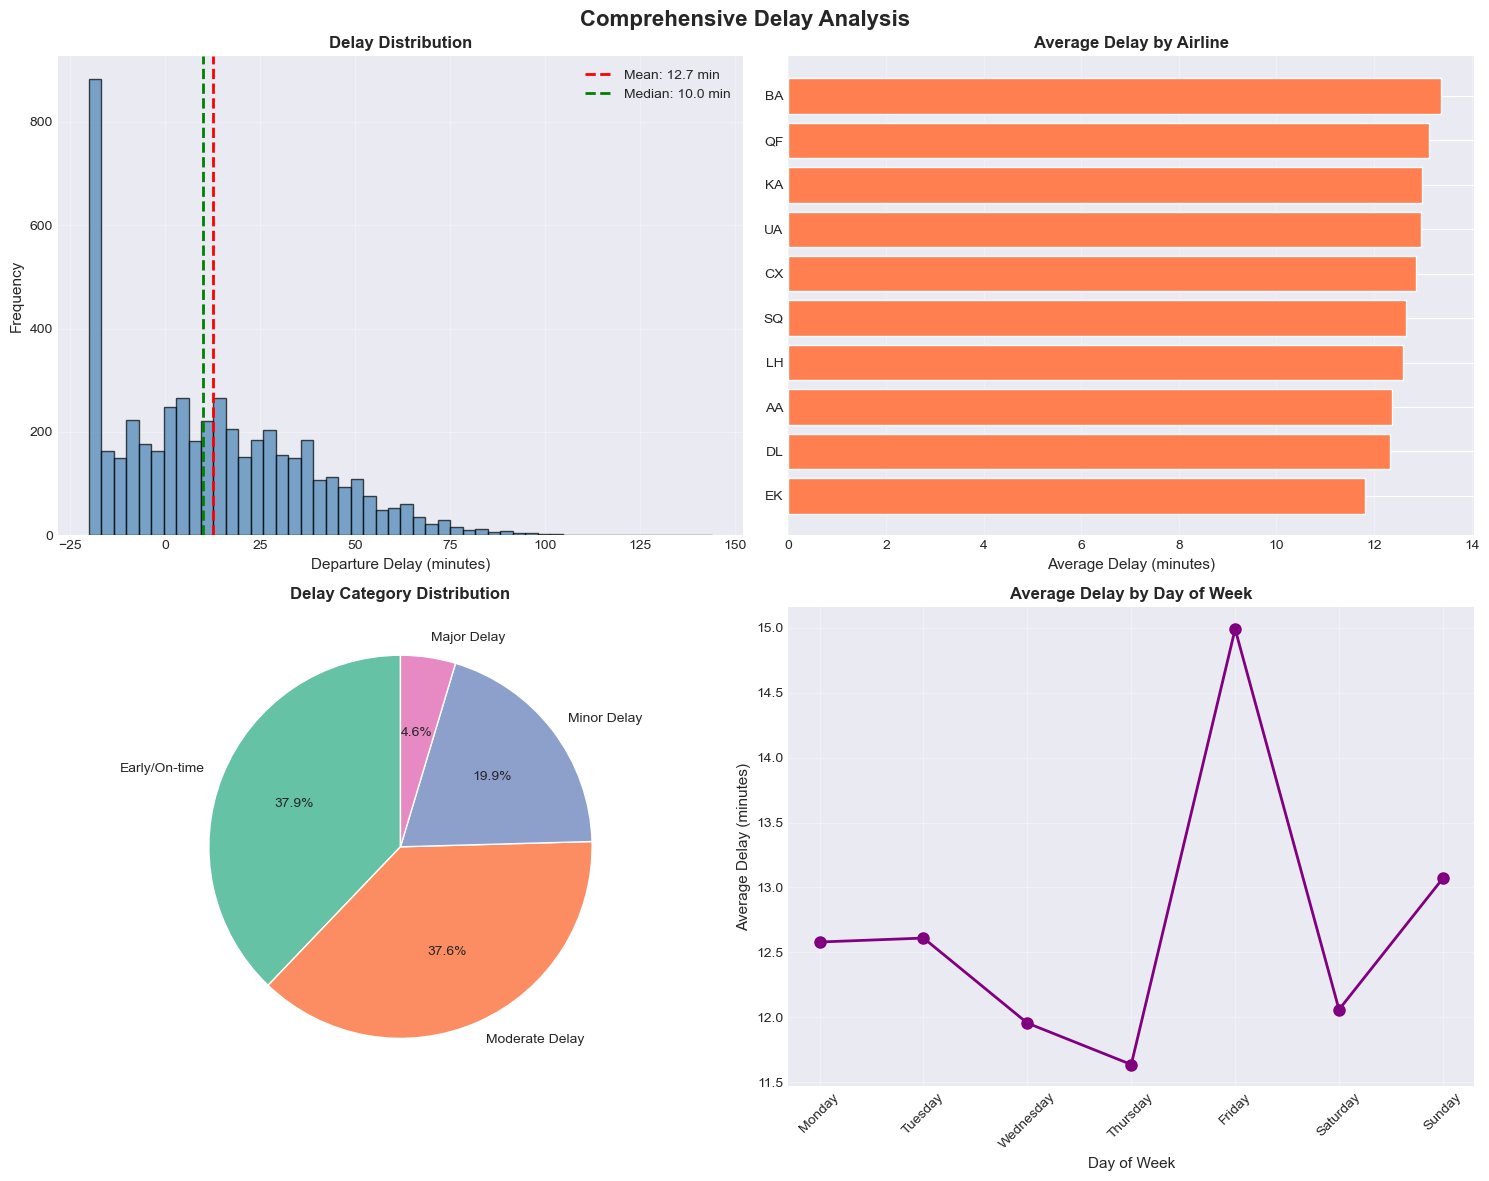

In [4]:
# Delay distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Comprehensive Delay Analysis', fontsize=16, fontweight='bold')

# Distribution histogram
axes[0, 0].hist(df['departure_delay'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].axvline(df['departure_delay'].mean(), color='red', linestyle='--', linewidth=2,
                  label=f'Mean: {df["departure_delay"].mean():.1f} min')
axes[0, 0].axvline(df['departure_delay'].median(), color='green', linestyle='--', linewidth=2,
                  label=f'Median: {df["departure_delay"].median():.1f} min')
axes[0, 0].set_xlabel('Departure Delay (minutes)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Delay Distribution', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Delay by airline
airline_delays = df.groupby('airline')['departure_delay'].mean().sort_values()
axes[0, 1].barh(airline_delays.index, airline_delays.values, color='coral')
axes[0, 1].set_xlabel('Average Delay (minutes)', fontsize=11)
axes[0, 1].set_title('Average Delay by Airline', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Delay category breakdown
delay_counts = df['delay_category'].value_counts()
axes[1, 0].pie(delay_counts.values, labels=delay_counts.index, autopct='%1.1f%%',
              startangle=90, colors=sns.color_palette("Set2"))
axes[1, 0].set_title('Delay Category Distribution', fontsize=12, fontweight='bold')

# Delay by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_delays = df.groupby('day_of_week')['departure_delay'].mean()
day_delays = day_delays.reindex([d for d in day_order if d in day_delays.index])
axes[1, 1].plot(day_delays.index, day_delays.values, marker='o', linewidth=2, 
               markersize=8, color='purple')
axes[1, 1].set_xlabel('Day of Week', fontsize=11)
axes[1, 1].set_ylabel('Average Delay (minutes)', fontsize=11)
axes[1, 1].set_title('Average Delay by Day of Week', fontsize=12, fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('visualizations/delay_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


In [5]:
# Interactive scatter plot: Distance vs Delay
fig = px.scatter(df.sample(min(2000, len(df))), 
                x='distance', 
                y='departure_delay',
                color='airline',
                size='flight_duration',
                hover_data=['origin', 'destination', 'day_of_week'],
                title='Flight Distance vs Departure Delay by Airline',
                labels={'distance': 'Distance (km)', 'departure_delay': 'Departure Delay (minutes)'})
fig.update_layout(height=600, width=1000)
fig.show()


## 6. Business Insights and Recommendations


In [6]:
print("="*60)
print("KEY BUSINESS INSIGHTS")
print("="*60)

# Insight 1: Best performing airline
best_airline = df.groupby('airline')['departure_delay'].mean().idxmin()
best_delay = df.groupby('airline')['departure_delay'].mean().min()
print(f"\n1. Best Performing Airline: {best_airline} (Avg Delay: {best_delay:.1f} min)")

# Insight 2: Worst performing airline
worst_airline = df.groupby('airline')['departure_delay'].mean().idxmax()
worst_delay = df.groupby('airline')['departure_delay'].mean().max()
print(f"2. Airline Needing Improvement: {worst_airline} (Avg Delay: {worst_delay:.1f} min)")

# Insight 3: Best day to fly
best_day = df.groupby('day_of_week')['departure_delay'].mean().idxmin()
best_day_delay = df.groupby('day_of_week')['departure_delay'].mean().min()
print(f"3. Best Day to Fly: {best_day} (Avg Delay: {best_day_delay:.1f} min)")

print("\n" + "="*60)
print("RECOMMENDATIONS")
print("="*60)
print("\n1. Focus operational improvements on routes with consistently high delays")
print("2. Optimize scheduling during peak delay periods")
print("3. Implement predictive analytics for delay forecasting")
print("4. Analyze root causes of delays by airline and route")
print("5. Consider weather and seasonal factors in delay patterns")
print("6. Monitor and benchmark performance against industry standards")


KEY BUSINESS INSIGHTS

1. Best Performing Airline: EK (Avg Delay: 11.8 min)
2. Airline Needing Improvement: BA (Avg Delay: 13.4 min)
3. Best Day to Fly: Thursday (Avg Delay: 11.6 min)

RECOMMENDATIONS

1. Focus operational improvements on routes with consistently high delays
2. Optimize scheduling during peak delay periods
3. Implement predictive analytics for delay forecasting
4. Analyze root causes of delays by airline and route
5. Consider weather and seasonal factors in delay patterns
6. Monitor and benchmark performance against industry standards
